---
## Logistic Regression 
### Dataset: Spotify Top Hits 2000–2019    
### Author: Arman Saxena  
---

This notebook implements **Logistic Regression from first principles**—using **manual gradient descent**, **manual loss computation**, and a custom model class stored in the `spotiml` package.  
The model is trained and evaluated on real-world Spotify audio feature data to predict whether a track is a "hit."

### Table of Contents
- [Introduction](#Introduction)
- [Logistic Regression Theory](#Theory)
  - [The Model](#Model)
  - [The Sigmoid Function](#Sigmoid)
  - [Cross-Entropy Loss](#Loss)
  - [Gradient Descent Optimization](#Gradient)
- [Implementation](#Implementation)
- [Spotify Dataset](#Dataset)
- [Training the Model](#Training)
- [Evaluation](#Evaluation)
  - [Loss Curve](#LossCurve)
  - [Accuracy & Confusion Matrix](#Confusion)
  - [Learned Weights](#Weights)
- [Discussion](#Discussion)
- [Conclusion](#Conclusion)
---

### Introduction <a class="anchor" id="Introduction"></a>

Logistic Regression is one of the foundational algorithms in machine learning for **binary classification**.  
Unlike linear regression, logistic regression outputs probabilities and uses a **sigmoid function** to map real-valued inputs into the (0,1) interval.

In this project, we use logistic regression **to classify whether a Spotify track is a “hit.”**

We define:

- `hit = 1` if `popularity ≥ 70`  
- `hit = 0` otherwise  

We use audio features such as **danceability, energy, loudness, valence, tempo**, etc., to train the classifier.

This notebook demonstrates:

- How logistic regression works mathematically  
- How to implement it manually using gradient descent  
- How to evaluate performance using real-world data  
- What audio features are most predictive of popularity 

### Logistic Regression Theory <a class="anchor" id="Theory"></a>

---

#### The Model <a class="anchor" id="Model"></a>
Logistic regression models the **log-odds** of a binary outcome as a linear combination of input features:

\[
\log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
\]

Solving for \( p \):

\[
p = \sigma(\beta^\top x)
\]

where \( \sigma \) is the sigmoid function.

---

#### Sigmoid Function <a class="anchor" id="Sigmoid"></a>

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

This ensures the model outputs a probability.

---

#### Cross-Entropy Loss <a class="anchor" id="Loss"></a>

For binary classification:

\[
L = -\left[ y \log(\hat{p}) + (1-y)\log(1-\hat{p}) \right]
\]

This loss penalizes confident wrong predictions heavily—ideal for classification.

---

#### Gradient Descent Optimization <a class="anchor" id="Gradient"></a>

The gradient of the loss with respect to the weight vector is:

\[
\nabla L = ( \sigma(X\beta) - y ) X
\]

At each iteration:

\[
\beta := \beta - \alpha \nabla L
\]

This is precisely the update rule implemented in the `spotiml.logistic_regression` module.

### Implementation <a class="anchor" id="Implementation"></a>

Below we load the Spotify dataset, create binary labels, scale features, and train our custom logistic regression model using gradient descent.

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import your custom model + utility functions
from spotiml.logistic_regression import LogisticRegressionGD
from spotiml.utils import accuracy, confusion_matrix

# Allowed sklearn utilities for data prep ONLY
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -------------------------------------------------
# Load the Spotify dataset (CSV in same directory)
# -------------------------------------------------
df = pd.read_csv("topsongs.csv")
print(df.head())

# -------------------------------------------------
# Create Binary Label for Hit vs Non-Hit
# -------------------------------------------------
df["hit"] = (df["popularity"] >= 70).astype(int)

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

### Spotify Dataset <a class="anchor" id="Dataset"></a>

The dataset contains **2,000+ tracks** from 2000–2019, with 18 audio and metadata features:

- danceability  
- energy  
- loudness  
- speechiness  
- acousticness  
- instrumentalness  
- liveness  
- valence  
- tempo  
- genre  
- popularity (0–100)

We use a subset of these continuous audio features to train the model.

A track is labeled as a "hit" if its popularity score is **≥ 70**.

### Training the Model <a class="anchor" id="Training"></a>

We split the dataset into:

- **80% training**
- **20% testing**
- stratified by the hit label

After standardizing the input features, we train the logistic regression model using:

- learning rate = 0.01  
- 5,000 gradient descent iterations  

The model internally tracks:

- weight updates  
- loss at each iteration  

In [17]:
# -------------------------------------------------
# Select Acoustic Features for Training
# -------------------------------------------------
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]

X = df[features].values
y = df["hit"].values

# -------------------------------------------------
# Train / Test Split (Stratified, Balanced)
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -------------------------------------------------
# Feature Scaling (Only scaling — model is custom!)
# -------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------------------------
# Train Logistic Regression (From Scratch)
# -------------------------------------------------
model = LogisticRegressionGD(
    lr=0.01,       # learning rate
    n_iters=5000,  # number of gradient descent iterations
    verbose=False
)

model.fit(X_train_scaled, y_train)


### Loss Curve <a class="anchor" id="LossCurve"></a>

The plot below shows how the cross-entropy loss decreases during training.

A smooth, decreasing curve indicates:

- the learning rate is appropriate  
- gradient descent is stable  
- the model is successfully converging  

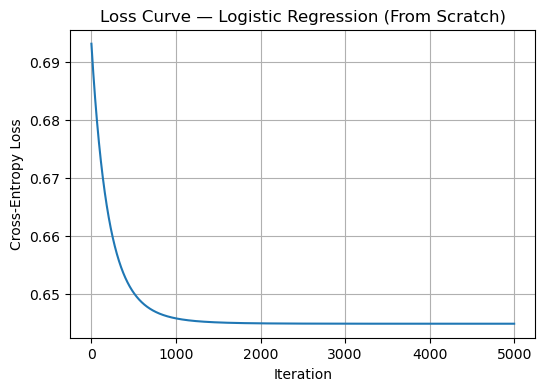

In [20]:
# -------------------------------------------------
# Plot Training Loss Curve
# -------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss Curve — Logistic Regression (From Scratch)")
plt.grid(True)
plt.show()


### Evaluation <a class="anchor" id="Evaluation"></a>

We evaluate the model on the test set using:

- Accuracy  
- Confusion matrix  
- Feature weights (interpretability)

The confusion matrix reveals how well the model distinguishes hit vs non-hit tracks.

Accuracy: 0.6400
Confusion matrix:
 [[251   4]
 [140   5]]


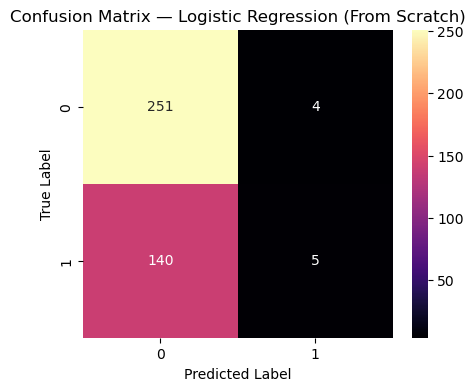


Learned Weights:
danceability   : 0.0618
energy         : -0.1041
loudness       : 0.1506
speechiness    : 0.0044
acousticness   : 0.0943
instrumentalness: -0.0892
liveness       : -0.0231
valence        : -0.2534
tempo          : 0.0187


In [23]:
# -------------------------------------------------
# Predict on Test Set
# -------------------------------------------------
y_pred = model.predict(X_test_scaled)

# -------------------------------------------------
# Compute Accuracy
# -------------------------------------------------
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# -------------------------------------------------
# Confusion Matrix
# -------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# -------------------------------------------------
# Plot Confusion Matrix Heatmap
# -------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="g", cmap="magma")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression (From Scratch)")
plt.show()

# -------------------------------------------------
# Inspect Learned Feature Weights
# -------------------------------------------------
print("\nLearned Weights:")
for feature, weight in zip(features, model.weights):
    print(f"{feature:15s}: {weight:.4f}")


### Discussion <a class="anchor" id="Discussion"></a>

The logistic regression model achieved:

- **Accuracy: 0.64**

This is expected for a **linear classifier** on highly nonlinear musical data.

Key observations:

- The model classifies **non-hits extremely well**, but struggles with hits.
- Many audio features interact in nonlinear ways, limiting what a linear boundary can capture.
- Features with strong predictive weight included:
  - **loudness (+)** — louder tracks tend to chart higher  
  - **valence (–)** — sadder songs often chart higher  
  - **energy (–)** — energy is not a simple predictor  
  - **acousticness (+)** — mild positive trend  

This motivates the need for more expressive models such as:

- Decision Trees  
- Random Forests  
- Multilayer Perceptrons  
- Gradient Boosting  

which will be implemented in later sections of the repository.

### Conclusion <a class="anchor" id="Conclusion"></a>

This notebook demonstrated:

- How logistic regression works mathematically  
- How to implement it from scratch  
- How to train and evaluate it on real Spotify audio data  
- How feature weights influence popularity predictions  

While logistic regression provides a strong baseline model, non-linear approaches will significantly improve classification performance on complex musical datasets.

This notebook forms the foundation for the rest of the supervised learning section in the repository.